<a href="https://colab.research.google.com/github/guilhermeterenciani/IA/blob/main/04_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando o conjunto de dados

In [ ]:

import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
import numpy as np
import pandas as pd

def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)




In [ ]:
!pwd

/content


In [ ]:
pd_train = pd.read_csv('sample_data/mnist_train_small.csv')
pd_valid = pd.read_csv('sample_data/mnist_test.csv')

In [ ]:
pd_train

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=pd_train.to_numpy()
ytrain=x[:,0]
xtrain=x[:,1:]

In [ ]:
x=pd_valid.to_numpy()
yvalid=x[:,0]
xvalid=x[:,1:]

In [ ]:
xvalid.shape


(9999, 784)

In [ ]:
ytrain

array([5, 7, 9, ..., 2, 9, 5])

In [ ]:
xtrain.shape

(19999, 784)

In [ ]:
m = xtrain[0].reshape((28,28))
for linha in m:
    print(linha)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0   0   0   0   0  28  59  50   0  23   0   0
  32 134 180 254 206   8   0   0   0   0]
[  0   0   0   0   0   0   0   0   4  96 216 233 254 248 215 231 215 215
 236 254 250 181  27   0   0   0   0   0]
[  0   0   0   0   0   0   0   0 108 254 254 247 175 175 175 176 175 175
 205 175  60   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0  47 254 245  85   0   0   0   0   0   0
   8   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0 152 254 158   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0  19 240 255  38   0  41  50   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0

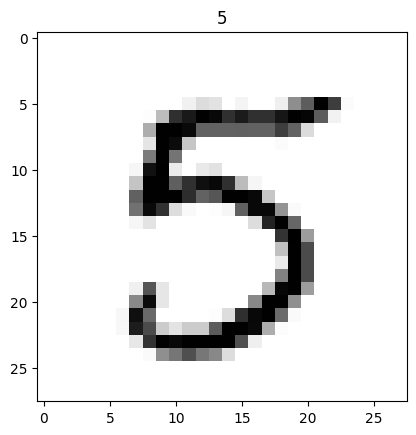

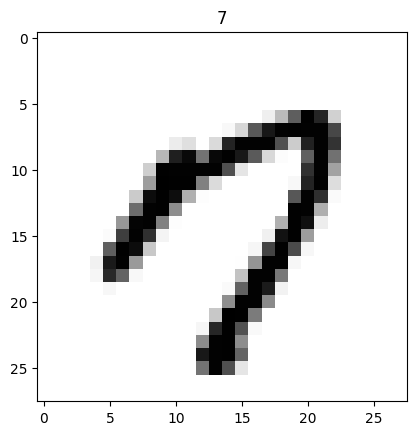

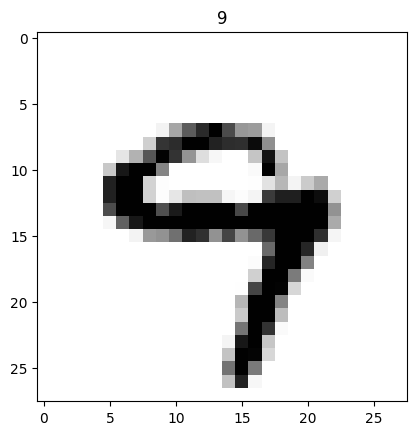

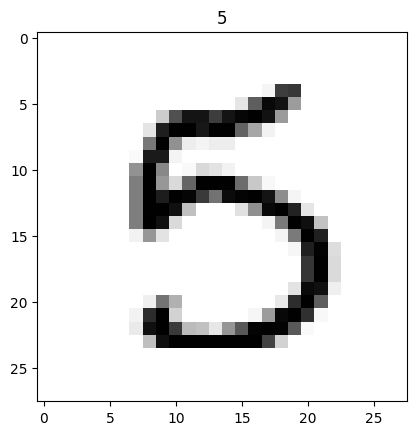

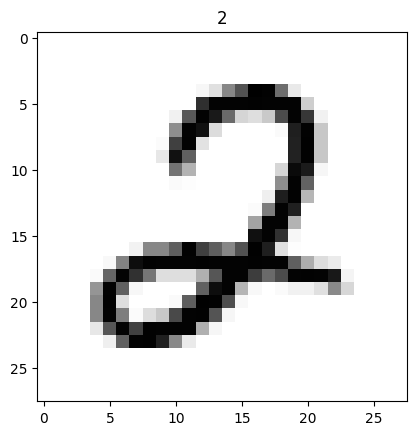

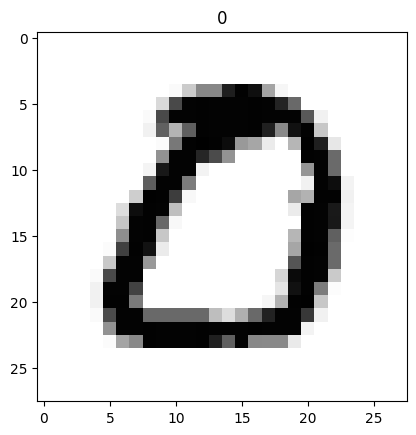

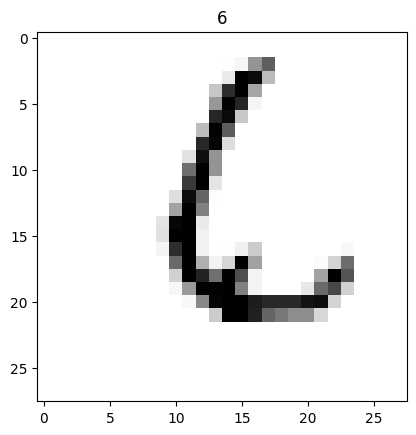

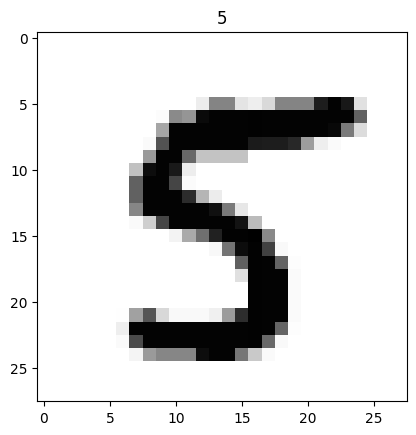

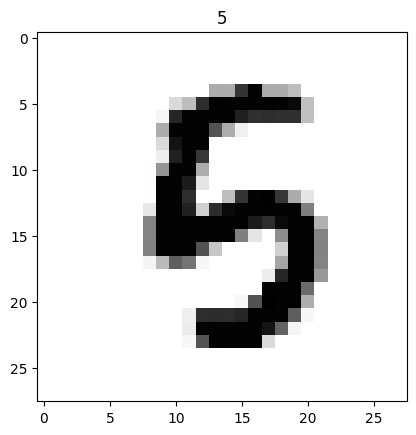

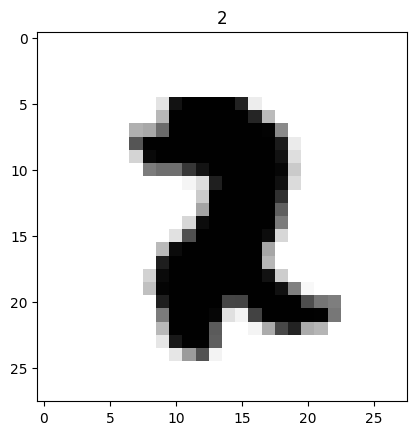

In [ ]:
for i in range(10):
    img = xtrain[i].reshape((28,28))
    plt.imshow(img,cmap='Greys')
    plt.title(ytrain[i])
    plt.show()

In [ ]:
def normalize(x,mean,stddev): return (x-mean)/stddev


In [ ]:
xtrain.mean(),xtrain.std()

(33.32772448571408, 78.60042309323919)

In [ ]:

xtrain_norm = normalize(xtrain,xtrain.mean(),xtrain.std())
xvalid_norm   = normalize(xvalid,xvalid.mean(),xvalid.std())

xtrain.mean(),xtrain.std(),xtrain_norm.mean(),xtrain_norm.std()

(33.32772448571408,
 78.60042309323919,
 1.714958889393234e-16,
 1.0000000000000004)

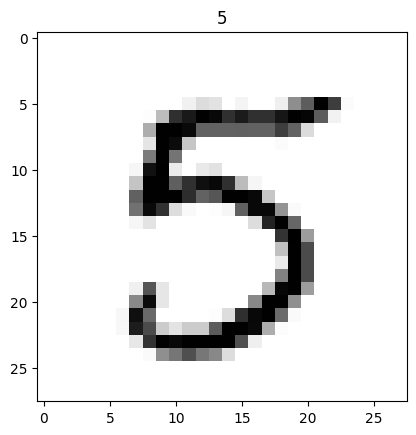

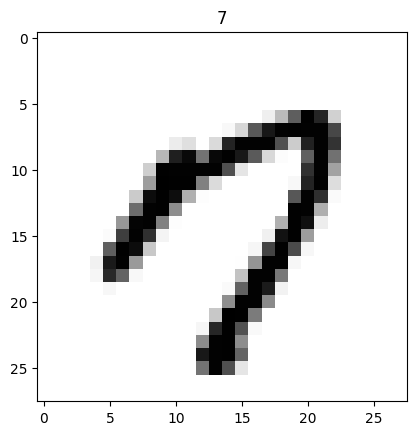

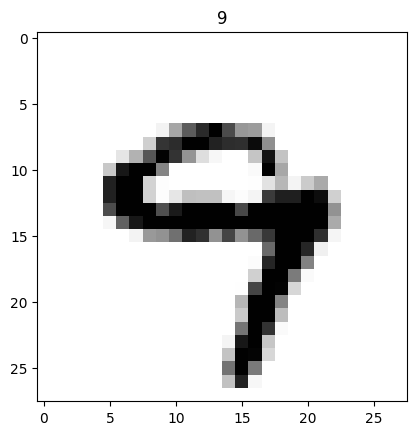

In [ ]:
for i in range(3):
    img = xtrain_norm[i].reshape((28,28))
    plt.imshow(img,cmap='Greys')
    plt.title(ytrain[i])
    plt.show()

# Estrutura básica

## Função linear

In [ ]:
xtrain_norm.shape,xtrain_norm.mean(),xtrain_norm.std()

((19999, 784), 1.714958889393234e-16, 1.0000000000000004)

In [ ]:
xtrain.shape

(19999, 784)

In [ ]:
ytrain[0]

5

In [ ]:
#numero neuronios
num_n = 50
n,m = xtrain.shape

# Inicializando com Xavier
w1 = np.random.randn(m,num_n)/np.sqrt(m)
w2 = np.random.randn(num_n,1)/np.sqrt(num_n)

In [ ]:
def lin(x,w): return x@w

In [ ]:
res = lin(xvalid_norm[0],w1)

In [ ]:
res.shape

(50,)

In [ ]:
res.mean(),res.std()

(0.060143123399261034, 1.1292606581543767)

In [ ]:
def relu(x): return np.maximum(x,0) -0.6

In [ ]:
def reglog(x): return 1/(1+np.exp(-x))

In [ ]:
res = reglog(lin(xvalid_norm,w1))

In [ ]:
res =reglog(xvalid_norm@w1)@w2

In [ ]:
res[0]


array([0.14482357])

In [ ]:
res

array([[0.14482357],
       [0.26155723],
       [0.21868447],
       ...,
       [0.1493883 ],
       [0.1252403 ],
       [0.40526896]])

In [ ]:
res.mean(),res.std()

(0.27744723741797783, 0.16120322568716192)

In [ ]:
res = reglog(lin(xvalid_norm,w1))

In [ ]:
def model(x):
    l1 = lin(x,w1) # x@w1
    l2 = reglog(l1)
    l3 = lin(l2,w2)
    return l3

In [ ]:
r = model(xtrain_norm)

In [ ]:
%timeit -n 10 _ = model(xtrain_norm)

180 ms ± 37.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Definindo a Loss

In [ ]:
def mse(x,y): return np.mean(np.power(x.squeeze(-1)-y,2))

In [ ]:
pred = model(xtrain_norm)

In [ ]:
pred.shape

(19999, 1)

In [ ]:
ytrain = ytrain.astype(float)

In [ ]:
ytrain.shape

(19999,)

In [ ]:
pred.squeeze(-1).shape

(19999,)

In [ ]:
x  = np.array([1,1])
y  = np.array([3,4])
print(x-y)

[-2 -3]


In [ ]:
pred.shape

(19999, 1)

In [ ]:
r = mse(pred,ytrain)

In [ ]:
r

26.101736816822807


##Calculando os gradientes


### Forward

$MLP(x) = \sigma(x\times w_1) \times w_2$

onde $\sigma(z) = \frac{1}{1+e^{-z}}$ é a função de ativação logística


Ao aplicamos a MSE como função loss obtemos

$Loss(x,y) = (\sigma(x\times w_1) \times w_2 - y)^2$

Assim temos

$f_1 = x\times w_1$

$f_2 = \sigma(f_1)$

$f_3 = f_2 \times w_2$

$f_4 = f_3 - y$

$f_5 = f_4^2$

Observe que $f_3$ é equivalente a $MLP(x)$

### Backward

Calculando as derivadas

$\frac{\partial f_1}{\partial  w_1} = x$

$\frac{\partial f_2}{\partial f_1} = \sigma(f_1) \times (1-\sigma(f_1)) = f_2(1-f_2)$

$\frac{\partial f_3}{\partial f_2} = w_2$


$\frac{\partial f_3}{\partial w_2} = f_2$


$\frac{\partial f_4}{\partial f_3} = 1$


$\frac{\partial f_5}{\partial f_4} = 2 f_4$

Assim


$\frac{\partial Loss}{\partial w_2} = \frac{\partial f_5}{\partial f_4} \frac{\partial f_4}{\partial f_3} \frac{\partial f_3}{\partial w_2} =  2 f_4 \times 1\times f_2$

$\frac{\partial Loss}{\partial w_1} = \frac{\partial f_5}{\partial f_4} \frac{\partial f_4}{\partial f_3} \frac{\partial f_3}{\partial f_2} \frac{\partial f_2}{\partial f_1} \frac{\partial f_1}{\partial w_1}= 2 f_4 \times 1\times w_2 \times f_2(1-f_2) \times x$






In [ ]:
#Exercício
#Implementar a MLP
def train(x, y):
    #numero neuronios
    num_n = 50
    n,m = x.shape
    # Inicializando com Kaiming
    w1 = np.random.randn(m,num_n)*np.sqrt(2/m)
    w2 = np.random.randn(num_n,1)*np.sqrt(2/num_n)
    alpha = 0.00001
    y=y.reshape(-1,1)
    for epoch in range(10000):
        f1 = x@w1                  #(100, 50)
        f2 = 1/(1+np.exp(-f1))     #(100, 50)
        f3 = f2@w2                 #(100, 1)
        f4 = f3 - y                #(100, 1)
        f5 = np.square(f4).sum()   # scalar
        #print(f1.shape,f2.shape,f3.shape,f4.shape,f5.shape)
        #(100, 50) (100, 50) (100, 1) (100, 1)

        if epoch%100==0: print(epoch,f5)

        # gradiente mse (100,1)
        df5 = 2.0*(f4)

        df4 = df5

        # gradiente w2 (50,100)x(100,1) = (50,1)
        g_w2     = f2.T.dot(df4)

        #          (100,1) (1,50) = (100,50)
        df3      = df4.dot(w2.T)

        # gradiente da sigmoid (100,50)*(100,50)*(1-(100,50)) = (100,50)
        df2      = df3*f2*(1-f2)

        # gradiente w1 (784,100)x(100,50) = (784,50)
        g_w1     = x.T.dot(df2)

        # atualizacao de pesos
        w1 -= alpha*g_w1
        w2 -= alpha*g_w2
    return (w1,w2)



Assim colocando código temos que

g_w2 = $\frac{dLoss}{dw_2}$  

g_w1 = $\frac{dLoss}{dw_1}$

Que representam os gradientes para a atualização

In [ ]:
r=train(xtrain_norm[:1000], ytrain[:1000])

0 32657.667196276714
100 3112.87957971764
200 2396.0908168128835
300 1887.745066078256
400 1507.968529983665
500 1219.1118739256658
600 993.8176821826636
700 814.4798690445884
800 670.4373760547298
900 554.625376892491
1000 461.48179550167845
1100 386.41631593702016
1200 325.7604276049449
1300 276.5603922209433
1400 236.41447841604105
1500 203.40306831739056
1600 176.03327630762323
1700 153.15942457061527
1800 133.90069051198859
1900 117.57436533097693
2000 103.64660884226566
2100 91.69652481679253
2200 81.38961241964415
2300 72.4579470211639
2400 64.68532449972591
2500 57.89607401069022
2600 51.94651546285314
2700 46.718265187641734
2800 42.11286260491232
2900 38.047474961223315
3000 34.45160564776603
3100 31.264711710840945
3200 28.434528532402496
3300 25.915853104190788
3400 23.669586812002812
3500 21.661923925360362
3600 19.86363755642953
3700 18.249447586331076
3800 16.797465538964072
3900 15.488712199273834
4000 14.306702171441419
4100 13.237088299086224
4200 12.267358462705335
4

In [ ]:
np.unique(ytrain[:1000],return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([ 85, 105, 113, 103,  88,  82,  87, 109, 108, 120]))

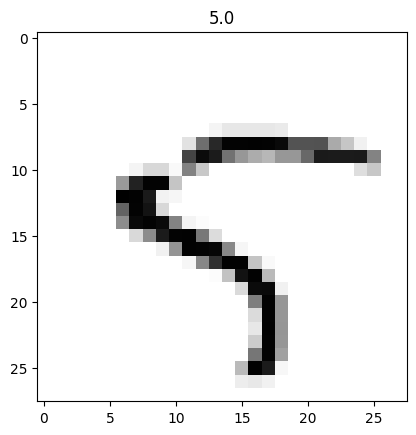

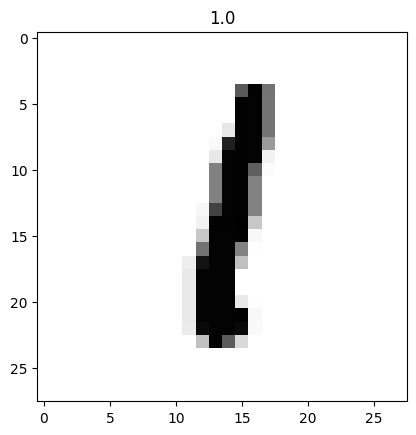

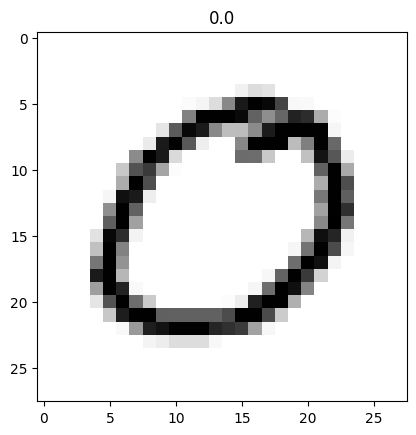

In [ ]:
for i in range(2000,2003):
    img = xtrain_norm[i].reshape((28,28))
    plt.imshow(img,cmap='Greys')
    plt.title(ytrain[i])
    plt.show()

In [ ]:
(wr1,wr2)=r

In [ ]:
reglog(xtrain_norm[2000:2003]@wr1)@wr2

array([[8.25851901],
       [1.00519316],
       [3.26005858]])

In [ ]:
# Mesmo código mas com representação mais compacta

def train(x, y):
    #numero neuronios
    num_n = 50
    n,m = x.shape
    # Inicializando com Kaiming
    w1 = np.random.randn(m,num_n)*np.sqrt(2/m)
    w2 = np.random.randn(num_n,1)*np.sqrt(2/num_n)
    alpha = 0.001

    print(type(x))
    y=y.reshape(-1,1)
    for epoch in range(100000):
        h = 1/(1+np.exp(-x.dot(w1)))
        y_pred = h.dot(w2)
        loss   = np.square(y_pred - y).sum()
        if epoch%1000==0: print(epoch,loss)
        g_y_pred = 2.0*(y_pred -y)
        g_w2     = h.T.dot(g_y_pred)
        g_h      = g_y_pred.dot(w2.T)
        g_w1     = x.T.dot(g_h*h*(1-h))
        w1 -= alpha*g_w1
        w2 -= alpha*g_w2

Exercício) Suponha que você esteja trabalhando em um problema de classificação binária para prever se um aluno será aprovado ou reprovado em um exame com base em duas características: horas de estudo e notas obtidas em provas anteriores.
Você tem um conjunto de dados de treinamento com 300 exemplos, onde x é uma matriz de tamanho 300x2, contendo as características de entrada (horas de estudo e notas de provas anteriores) e y é um vetor de tamanho 300, contendo os rótulos de aprovação/reprovação correspondentes (0 para reprovação e 1 para aprovação).
>Obs.: Crie sua própria base de dados ou faça um random.rand()*10 para, por exemplo, criar valores de 0 a 10.
Além disso, explique ao final o que você entendeu sobre o resultado e o que significa o valor final.

Exercício) Implemente uma MLP com 1 camada oculta e 2 neurônios de entrada, 3 neurônios ocultos e 1 neurônio de saída. Use a função de ativação sigmoid para todos os neurônios. Treine a MLP usando backpropagation em um conjunto de dados simples, como o problema XOR, por exemplo.

Exercício) Modifique o exercício anterior para usar uma função de ativação diferente para os neurônios ocultos, como ReLU. Compare o desempenho da MLP modificada com a MLP original.

Exercício) Implemente uma MLP com 2 camadas ocultas e 3 neurônios de entrada, 5 neurônios ocultos na primeira camada oculta, 4 neurônios ocultos na segunda camada oculta e 1 neurônio de saída. Use a função de ativação sigmoid para todos os neurônios. Treine a MLP usando backpropagation em um conjunto de dados mais complexo, como o problema de classificação de flores Iris, por exemplo.

Exercício) Modifique o exercício anterior para usar uma função de ativação diferente para os neurônios ocultos, como ReLU. Compare o desempenho da MLP modificada com a MLP original.

Exemplo) Suponha que temos um conjunto de dados consistindo em 4 entradas e saídas da seguinte forma:

Entrada1 Entrada2 Saída

0 0 0

0 1 1

1 0 1

1 1 0

Queremos treinar uma MLP com uma camada oculta e 2 neurônios de entrada, 3 neurônios ocultos e 1 neurônio de saída. Usaremos a função de ativação sigmoid para todos os neurônios.

Primeiro, precisamos inicializar os pesos da MLP aleatoriamente. Vamos assumir as seguintes matrizes de peso para a MLP:

W1 = [[-0.2, 0.3], [0.4, -0.5], [-0.6, 0.1]]

W2 = [[0.7, -0.8, 0.9]]

Aqui, W1 contém os pesos que conectam a camada de entrada à camada oculta, e W2 contém os pesos que conectam a camada oculta à camada de saída.

Em seguida, definiremos os algoritmos forward pass e backward pass. O algoritmo forward pass calcula a saída da MLP dada uma entrada, e o algoritmo backward pass calcula os gradientes dos pesos em relação à função de perda usando backpropagation.

In [ ]:
W1 = np.array([[-0.2, 0.3], [0.4, -0.5], [-0.6, 0.1]])
W2 = np.array([[0.7, -0.8, 0.9]])
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

def forward_pass(x):
    z1 = np.dot(W1, x)
    h1 = 1 / (1 + np.exp(-z1))
    z2 = np.dot(W2, h1)
    y = 1 / (1 + np.exp(-z2))
    return y

  # Aqui, x é o vetor de entrada, z1 e h1 são os valores de pré-ativação
  # e ativação para a camada oculta, e z2 e y são os valores de
  # pré-ativação e ativação para a camada de saída.

In [ ]:
def backward_pass(x, y_true, y_pred):
    dL_dy = y_pred - y_true
    dy_dz2 = y_pred * (1 - y_pred)
    dz2_dw2 = h1.T
    dL_dw2 = np.dot(dL_dy * dy_dz2, dz2_dw2)
    dz2_dh1 = W2
    dh1_dz1 = h1 * (1 - h1)
    dz1_dw1 = x
    dL_dw1 = np.dot(np.dot(dL_dy * dy_dz2, dz2_dh1), dh1_dz1) * dz1_dw1.T

    return dL_dw1, dL_dw2

Aqui, y_true é o valor de saída verdadeiro para a entrada x, dL_dy é a derivada da função de perda em relação ao valor de saída previsto y_pred, e dy_dz2 é a derivada da função de ativação sigmoid.

dz2_dw2 é a derivada dos valores de pré-ativação em relação aos pesos que conectam a camada oculta à camada de saída, e dL_dw2 é o gradiente da função de perda em relação a esses pesos. Da mesma forma, dz2_dh1 é a derivada dos valores de pré-ativação em relação aos valores de ativação para a camada oculta, e dh1_dz1 é a derivada da função de ativação sigmoid. dz1_dw1 é a derivada dos valores de pré-ativação em relação aos pesos que conectam a camada de entrada à camada oculta, e dL_dw1 é o gradiente da função de perda em relação a esses pesos.

Finalmente, treinaremos a MLP no conjunto de dados usando descida de gradiente estocástica (SGD)

In [ ]:
taxa_de_aprendizagem = 0.1

for epoch in range(10000):
    for i in range(len(X)):
        x = X[i].reshape(-1, 1)
        y_true = y[i]

        z1 = np.dot(W1, x)
        h1 = 1 / (1 + np.exp(-z1))
        z2 = np.dot(W2, h1)
        y_pred = 1 / (1 + np.exp(-z2))

        dL_dw1, dL_dw2 = backward_pass(x, y_true, y_pred)

        W1 -= taxa_de_aprendizagem * dL_dw1
        W2 -= taxa_de_aprendizagem * dL_dw2

Aqui, X é a matriz de entrada e y é o vetor de saída para o conjunto de dados. Percorremos o conjunto de dados len(X) vezes, e para cada par de entrada-saída (x, y_true), calculamos o forward pass usando os pesos atuais, calculamos o backward pass para obter os gradientes dos pesos em relação à função de perda e atualizamos os pesos usando a taxa de aprendizado.

Após o treinamento ser concluído, podemos usar a MLP para fazer previsões em novas entradas passando as entradas pelo algoritmo forward pass:

In [ ]:
for i in range(len(X)):
    x = X[i].reshape(-1, 1)
    y_pred = forward_pass(x)
    print(f"Input: {x.flatten()}, True output: {y[i]}, Predicted output: {y_pred[0]}")

Isso imprimirá a saída prevista para cada entrada no conjunto de dados, juntamente com a saída verdadeira.

Este é um exemplo simples de como implementar uma MLP manualmente usando a função de ativação sigmoid e backpropagation. Você pode modificar este código para experimentar com diferentes funções de ativação, números de camadas ocultas e neurônios, e técnicas de regularização.